In [1]:
%pip install ultralytics --upgrade --quiet

Note: you may need to restart the kernel to use updated packages.


In [1]:
from ultralytics import YOLO
import os
from IPython.display import Image, display
import matplotlib.pyplot as plt
import cv2
import random

In [2]:
dataset_path = os.path.join(os.getcwd(), "dataset")  # Automatically finds "dataset" folder in the same directory
print("Dataset path set to:", dataset_path)

Dataset path set to: c:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset


In [3]:
for split in ["train", "valid", "test"]:
    label_dir = os.path.join(dataset_path, split, "label")
    if os.path.exists(label_dir):
        os.rename(label_dir, os.path.join(dataset_path, split, "labels"))
        print(f"Renamed {label_dir} to 'labels'")


In [4]:
data_yaml_content = f"""
path: {dataset_path}
train: train/images
val: valid/images
test: test/images

nc: 1
names: ['cancer']
"""

with open("cancer_data.yaml", "w") as f:
    f.write(data_yaml_content)

print("✅ Created cancer_data.yaml")

✅ Created cancer_data.yaml


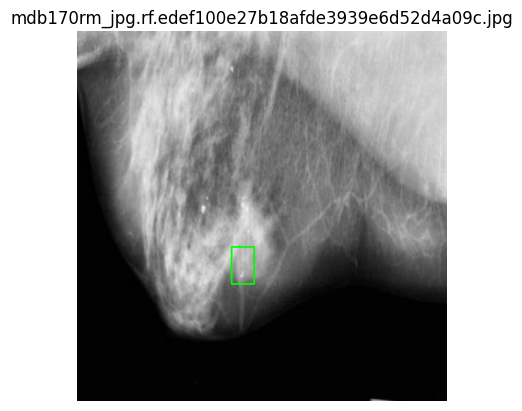

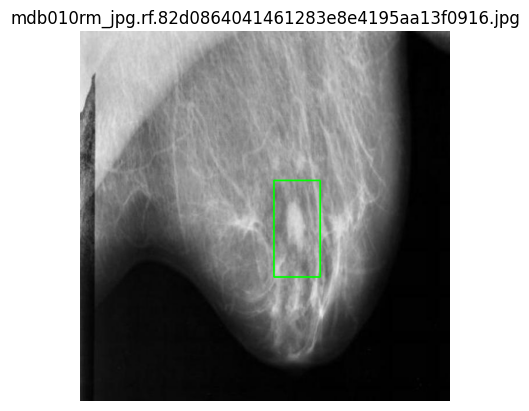

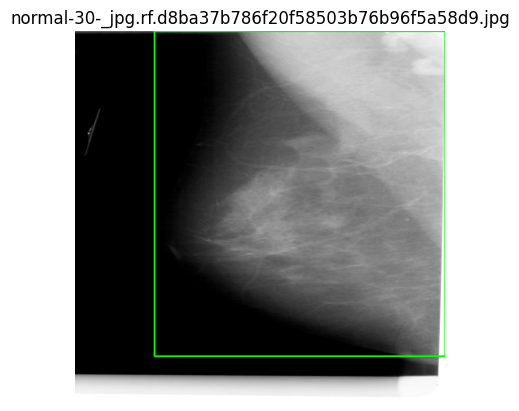

In [5]:
def show_random_images(image_folder, label_folder, num_images=3):
    image_files = os.listdir(image_folder)
    selected = random.sample(image_files, min(num_images, len(image_files)))

    for img_name in selected:
        img_path = os.path.join(image_folder, img_name)
        label_path = os.path.join(label_folder, img_name.replace('.jpg', '.txt').replace('.png', '.txt'))

        img = cv2.imread(img_path)
        h, w = img.shape[:2]

        if os.path.exists(label_path):
            with open(label_path, 'r') as f:
                for line in f:
                    cls, x, y, bw, bh = map(float, line.strip().split())
                    x1 = int((x - bw / 2) * w)
                    y1 = int((y - bh / 2) * h)
                    x2 = int((x + bw / 2) * w)
                    y2 = int((y + bh / 2) * h)
                    cv2.rectangle(img, (x1, y1), (x2, y2), (0, 255, 0), 2)
        
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
        plt.axis('off')
        plt.title(img_name)
        plt.show()

# Show sample images from training set
show_random_images(
    os.path.join(dataset_path, "train/images"),
    os.path.join(dataset_path, "train/labels"),
    num_images=3
)


In [6]:
model = YOLO("yolov8n.pt")  # You can use yolov8m.pt or yolov8l.pt for higher accuracy

model.train(
    data="cancer_data.yaml",
    epochs=5,
    imgsz=640,
    batch=16,
    name="cancer-detector"
)

100%|██████████| 6.25M/6.25M [00:00<00:00, 15.5MB/s]


Ultralytics 8.3.137  Python-3.12.8 torch-2.7.0+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
engine\trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=cancer_data.yaml, degrees=0.0, deterministic=True, device=cpu, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=5, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=cancer-detector, nbs=64, nms=False, opset=None, optimize=False, optimizer=auto, overlap_mask=True, patience=100, perspective=0.0, plots=True, pose=12.0, pretrai

train: Scanning C:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\train\labels... 1281 images, 0 backgrounds, 241 corrupt: 100%|██████████| 1281/1281 [00:00<00:00, 1726.91it/s]

train: C:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\train\images\normal-106-_jpg.rf.0b0f367c5ed61886d5594dde4c87e337.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: C:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\train\images\normal-110-_jpg.rf.38f97b6a5c48396ba65f115b2dd9aee8.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: C:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\train\images\normal-12-_jpg.rf.56a3387c97a41ecd56f3ac333bf9d2fa.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: C:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\train\images\normal-124-_jpg.rf.586c344fe21496dc415b5030094d8099.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
train: C:\Users\r

train: New cache created: C:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\train\labels.cache
val: Fast image access  (ping: 0.10.0 ms, read: 100.040.2 MB/s, size: 22.8 KB)


c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
val: Scanning C:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\valid\labels... 240 images, 0 backgrounds, 69 corrupt: 100%|██████████| 240/240 [00:00<00:00, 1566.89it/s]

val: C:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\valid\images\normal-107-_jpg.rf.bbdb60a25197ceed66662123d628dc8d.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: C:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\valid\images\normal-133-_jpg.rf.6126a06223115f09ae71541264219493.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: C:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\valid\images\normal-138-_jpg.rf.274ddd1c812e4ad20187a83e26407e26.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: C:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\valid\images\normal-141-_jpg.rf.36662a87d2e53ca50586f61106c1550d.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: C:\Users\rishi\OneD

val: New cache created: C:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\valid\labels.cache


c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Plotting labels to runs\detect\cancer-detector\labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.002, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 0 dataloader workers
Logging results to runs\detect\cancer-detector
Starting training for 5 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/5         0G      2.565      4.469       2.23         24        640: 100%|██████████| 65/65 [07:30<00:00,  6.93s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:29<00:00,  4.94s/it]

                   all        171        182    0.00179      0.505    0.00189   0.000695



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/5         0G      2.468       3.82      2.044         21        640: 100%|██████████| 65/65 [07:35<00:00,  7.01s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:29<00:00,  4.96s/it]

                   all        171        182   0.000727      0.203   0.000701   0.000196



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/5         0G      2.405      3.491      2.015         30        640: 100%|██████████| 65/65 [08:12<00:00,  7.58s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:28<00:00,  4.81s/it]

                   all        171        182     0.0106      0.242     0.0056    0.00186



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        4/5         0G      2.298      3.162      1.938         25        640: 100%|██████████| 65/65 [07:43<00:00,  7.12s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:27<00:00,  4.62s/it]

                   all        171        182       0.31     0.0642     0.0868     0.0348



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        5/5         0G      2.195      2.959      1.891         19        640: 100%|██████████| 65/65 [08:08<00:00,  7.52s/it]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:26<00:00,  4.49s/it]

                   all        171        182      0.431      0.192      0.189     0.0654



5 epochs completed in 0.693 hours.
Optimizer stripped from runs\detect\cancer-detector\weights\last.pt, 6.2MB
Optimizer stripped from runs\detect\cancer-detector\weights\best.pt, 6.2MB

Validating runs\detect\cancer-detector\weights\best.pt...
Ultralytics 8.3.137  Python-3.12.8 torch-2.7.0+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 6/6 [00:24<00:00,  4.03s/it]


                   all        171        182      0.438      0.192       0.19      0.066
Speed: 3.7ms preprocess, 124.9ms inference, 0.0ms loss, 2.6ms postprocess per image
Results saved to runs\detect\cancer-detector


ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002AA61CE3D40>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.03003,    0.031031,    0.032032,    0.033033,    0.034034,    0.035035,    0.036036,    0.037037,    0.038038,    0.039039,     0.04004,    0.041041,    0.042042,    0.043043,    0.044044,    0.045045,    0.046046,    0.047047,
          0.0480

In [7]:
metrics = model.val()
print("📈 Validation Results:", metrics)


Ultralytics 8.3.137  Python-3.12.8 torch-2.7.0+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
Model summary (fused): 72 layers, 3,005,843 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access  (ping: 0.10.0 ms, read: 131.477.0 MB/s, size: 24.6 KB)


val: Scanning C:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\valid\labels.cache... 240 images, 0 backgrounds, 69 corrupt: 100%|██████████| 240/240 [00:00<?, ?it/s]

val: C:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\valid\images\normal-107-_jpg.rf.bbdb60a25197ceed66662123d628dc8d.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: C:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\valid\images\normal-133-_jpg.rf.6126a06223115f09ae71541264219493.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: C:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\valid\images\normal-138-_jpg.rf.274ddd1c812e4ad20187a83e26407e26.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: C:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\valid\images\normal-141-_jpg.rf.36662a87d2e53ca50586f61106c1550d.jpg: ignoring corrupt image/label: Label class 1 exceeds dataset class count 1. Possible class labels are 0-0
val: C:\Users\rishi\OneD


c:\Users\rishi\AppData\Local\Programs\Python\Python312\Lib\site-packages\torch\utils\data\dataloader.py:665: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 11/11 [00:20<00:00,  1.86s/it]


                   all        171        182      0.438      0.192       0.19      0.066
Speed: 2.9ms preprocess, 106.4ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs\detect\cancer-detector2
📈 Validation Results: ultralytics.utils.metrics.DetMetrics object with attributes:

ap_class_index: array([0])
box: ultralytics.utils.metrics.Metric object
confusion_matrix: <ultralytics.utils.metrics.ConfusionMatrix object at 0x000002AA54D33560>
curves: ['Precision-Recall(B)', 'F1-Confidence(B)', 'Precision-Confidence(B)', 'Recall-Confidence(B)']
curves_results: [[array([          0,    0.001001,    0.002002,    0.003003,    0.004004,    0.005005,    0.006006,    0.007007,    0.008008,    0.009009,     0.01001,    0.011011,    0.012012,    0.013013,    0.014014,    0.015015,    0.016016,    0.017017,    0.018018,    0.019019,     0.02002,    0.021021,    0.022022,    0.023023,
          0.024024,    0.025025,    0.026026,    0.027027,    0.028028,    0.029029,     0.030

In [8]:
results = model.predict(source=os.path.join(dataset_path, "test/images"), save=True, conf=0.25)


image 1/121 c:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\test\images\mdb001lm_jpg.rf.e9bea79d164b1e72a59d8bfc67eae682.jpg: 640x640 (no detections), 176.0ms
image 2/121 c:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\test\images\mdb002rl_jpg.rf.274ce2d69d7c23e3c3a5f942821224ed.jpg: 640x640 (no detections), 106.4ms
image 3/121 c:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\test\images\mdb012rl_jpg.rf.c3f42067ec1a1218b1bbbd18f18e7c63.jpg: 640x640 1 cancer, 101.5ms
image 4/121 c:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\test\images\mdb013ll_jpg.rf.06809bd44b003338731a448b7df39c6d.jpg: 640x640 (no detections), 111.3ms
image 5/121 c:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\test\images\mdb015lm_jpg.rf.daf4dda40498cee4f1e3935879721eb7.jpg: 640x640 1 cancer, 115.1ms
image 6/121 c:\Users\rishi\OneDrive\Desktop\Breast Cancer Detection\dataset\test\images\mdb025ll_jpg.rf.7f9ccc79d7748a977f6c312df54c94ae.j

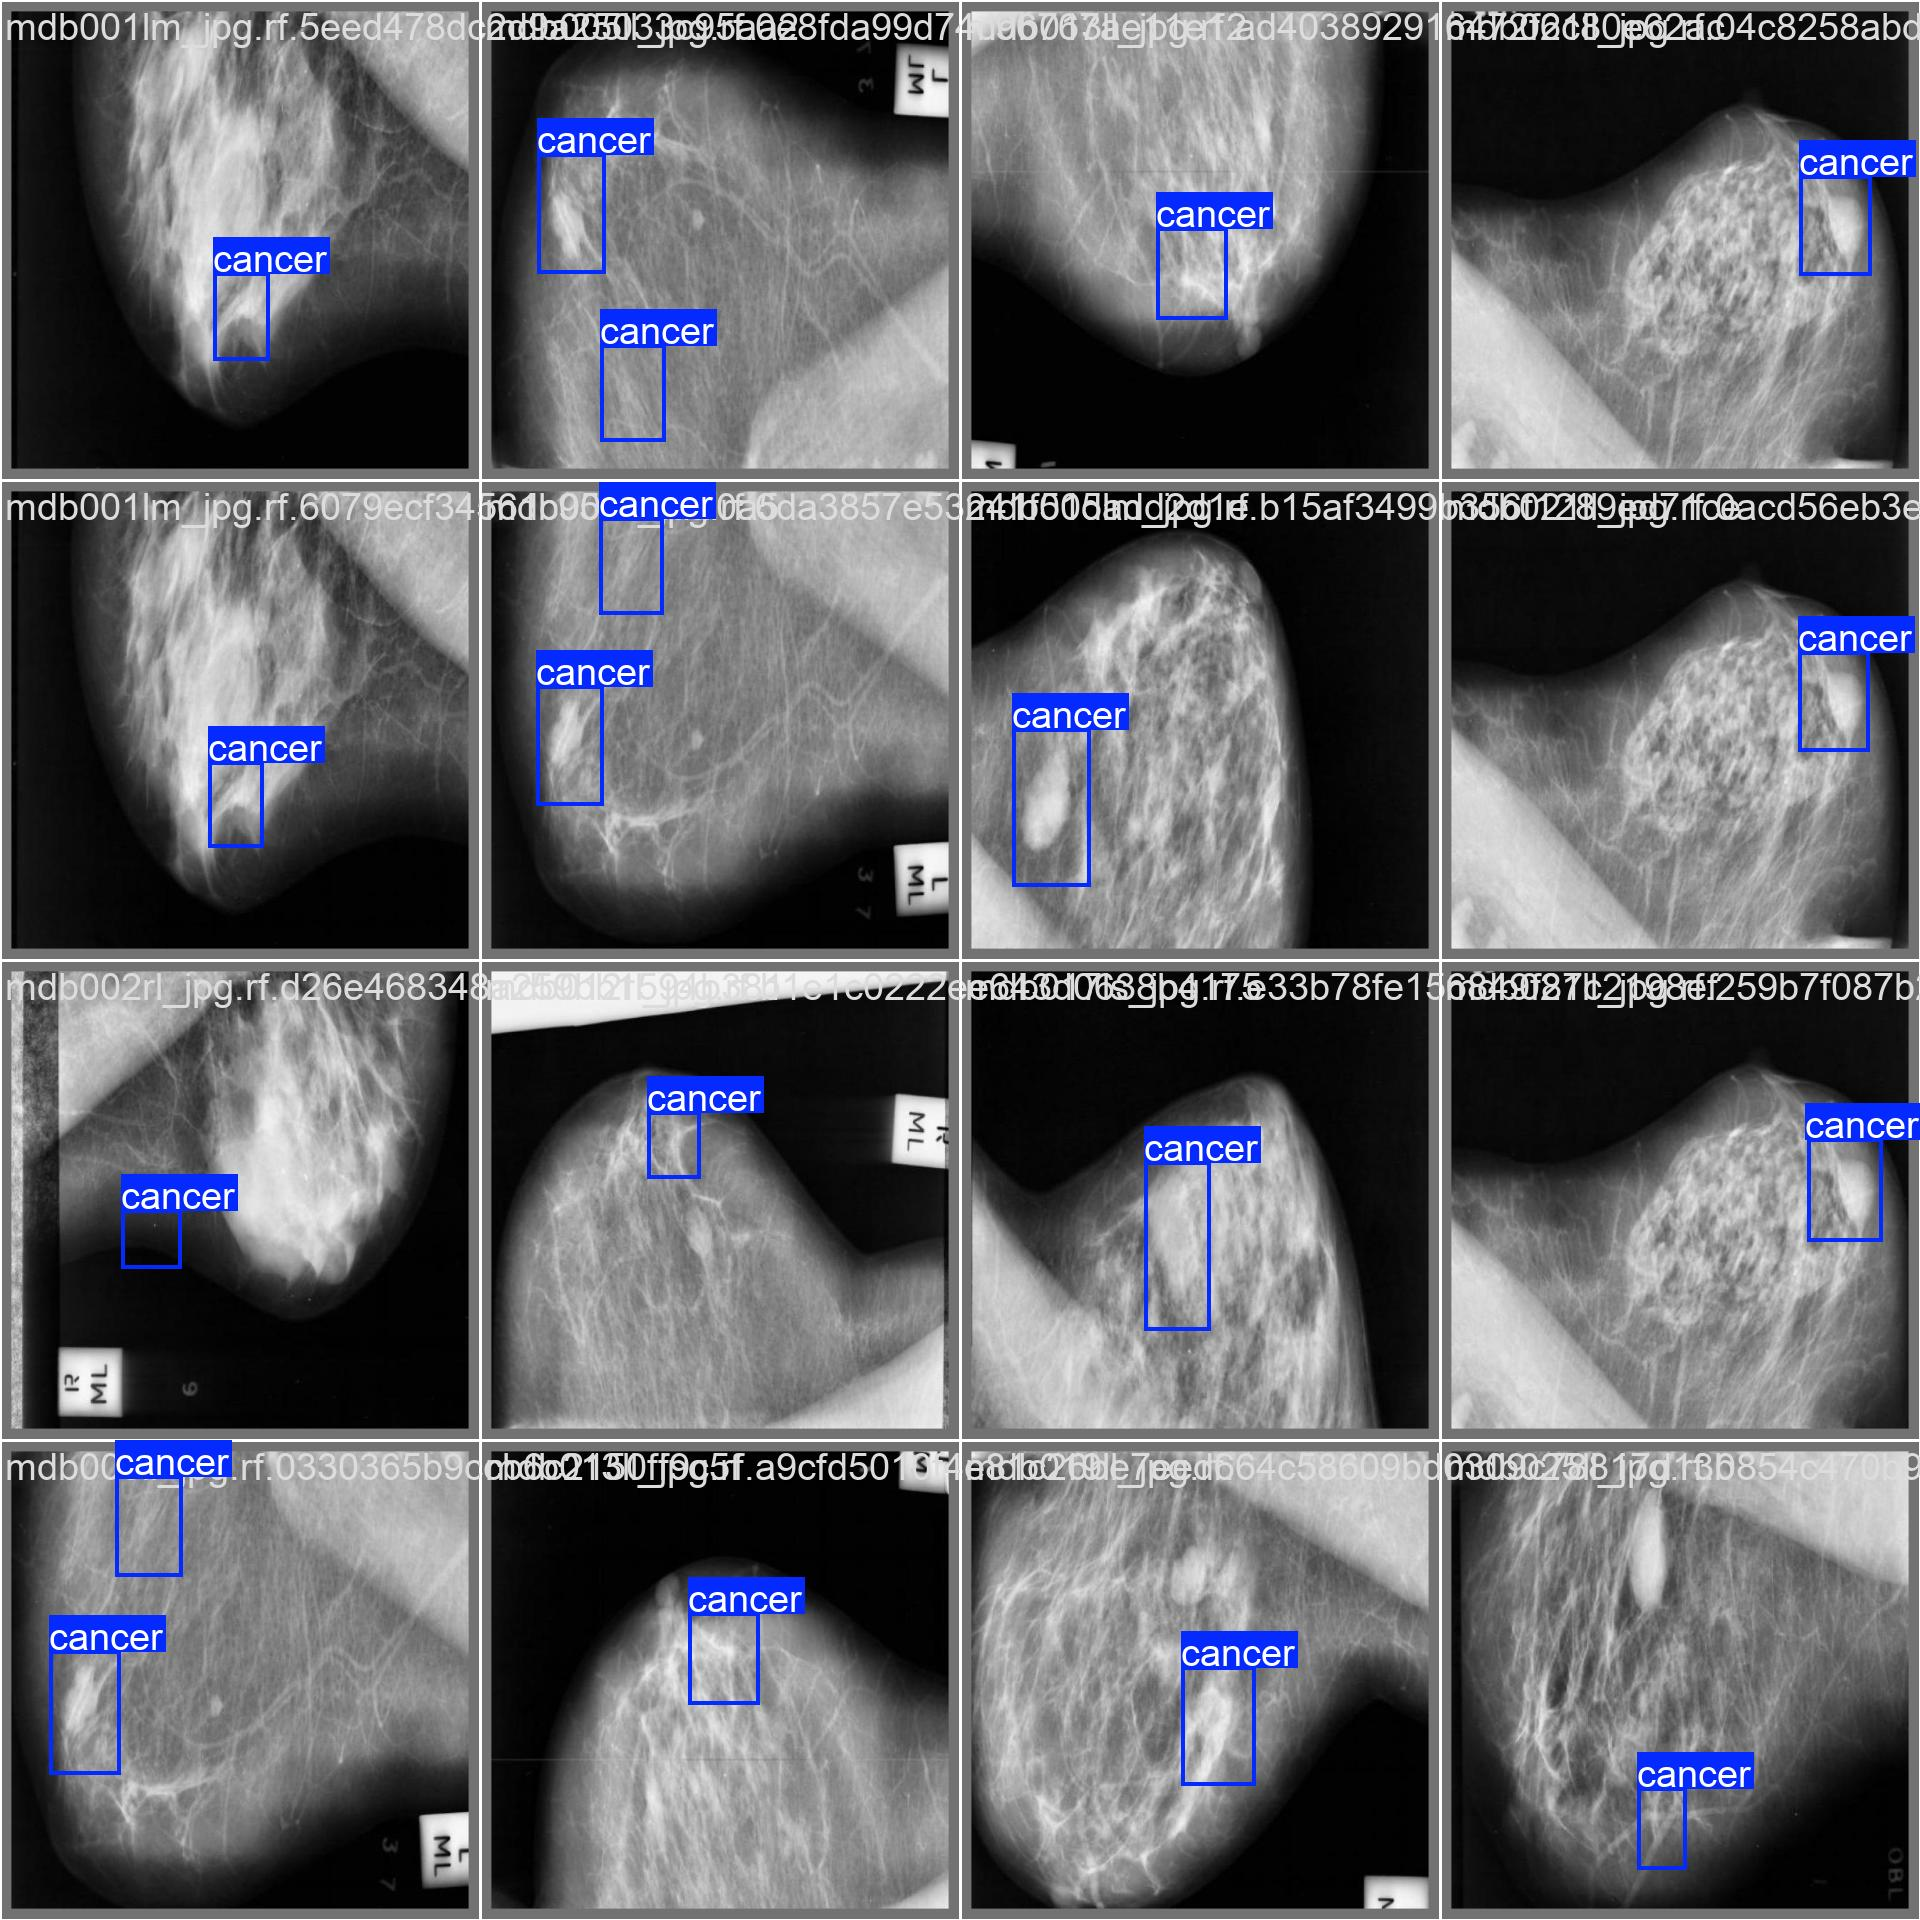

In [11]:
from glob import glob
predicted_images = glob("runs/detect/cancer-detector2*/" + "*.jpg")
if predicted_images:
    display(Image(filename=predicted_images[0]))
else:
    print("No predictions found.")

In [12]:
model.export(format="onnx")

Ultralytics 8.3.137  Python-3.12.8 torch-2.7.0+cpu CPU (Intel Core(TM) i5-10300H 2.50GHz)
 ProTip: Export to OpenVINO format for best performance on Intel CPUs. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'runs\detect\cancer-detector\weights\best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 5, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.53', 'onnxruntime'] not found, attempting AutoUpdate...
   ---------------------------------------- 14.5/14.5 MB 14.3 MB/s eta 0:00:00
   ---------------------------------------- 12.7/12.7 MB 13.7 MB/s eta 0:00:00
   ---------------------------------------- 6/6 [onnxruntime]y]

requirements: AutoUpdate success  26.2s, installed 3 packages: ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.53', 'onnxruntime']
WARNING requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1.17.0 opset 19...
ONNX: 

'runs\\detect\\cancer-detector\\weights\\best.onnx'